TO DO LIST:
1. Get sales data and graph it (DONE)
2. Get predictor data to try out creating a regression model
    ~ borough?
    ~ CPI? Inflation?
    ~ mortgage rates
    ~ how many homes were on the market?

In [25]:
#import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

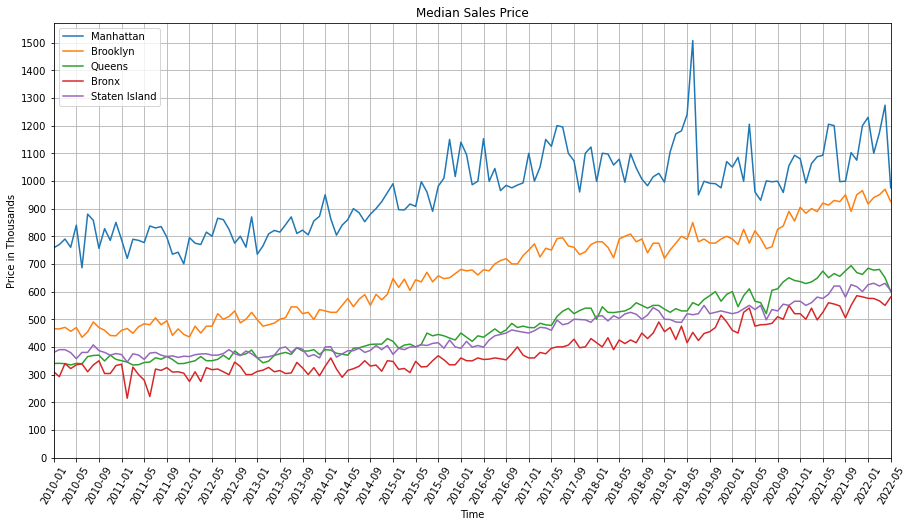

In [82]:
#Read in data from CSV obtained from Streeteasy data dashboard
df = pd.read_csv("medianSalesPrice_All.csv", index_col=False)

#Select only boroughs using the areaType column, then drop some columns
df = df[df['areaType']=='borough'].reset_index(drop=True).drop(columns={'areaName', 'areaType'})

##create list of dates
date_list = list(df.columns)
date_list.pop(0)

#Rearrange data so we have a list of date, borough, and median sales price
df = df.melt(id_vars = 'Borough', var_name = 'Date' ,value_name = 'Median Sales Price')

#create list of boroughs to use later
borough_list = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

#create figure
plt.figure(figsize=(15,8))

#plot each boroughs line by using a loop
#for each borough in the borough list, set the current borough dataframe to be only values from that borough
#then plot the line for each using the data and median sales price column
for borough in borough_list:
    current_borough_df = df[df['Borough'] == borough]
    plt.plot(current_borough_df['Date'], current_borough_df['Median Sales Price'])
    
#setup axes object
ax=plt.subplot()
#set y ticks
ax.set_yticks(np.arange(0, int(max(df['Median Sales Price'])), 100000))
ax.set_yticklabels(np.arange(0, int(max(df['Median Sales Price'])/1000), 100))
#set xticks
ax.set_xticks(np.arange(0, len(date_list), 4))
#rotate xticks
plt.margins(x=0)
plt.xticks(rotation=60)
plt.title("Median Sales Price")
plt.xlabel("Time")
plt.ylabel("Price in Thousands")
plt.legend(borough_list)
plt.grid()
plt.show()
